In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,log_loss,precision_score,precision_recall_curve, recall_score
import warnings
warnings.filterwarnings("ignore")

# Soru 1:
In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. 

* Evaluate the performance of your model with the metrics you have learned in this course.
* Plot the ROC and the precision / recall curves for different "c" values.

In [2]:
df=pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
C              0
Q              0
S              0
dtype: int64

In [3]:
df["Cabin"].fillna(df["Cabin"].mode()[0], inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Age"]=df.groupby("Sex")["Age"].apply(lambda x: x.fillna(x.mode()[0]))

In [4]:
df["Sex"]=pd.get_dummies(df["Sex"],drop_first=True)

In [5]:
embarked=pd.get_dummies(df["Embarked"], drop_first=False)

df=pd.concat([df, embarked], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,0,1


In [11]:
# Veri temizliğini yaptıktan sonra metrikleri kullanarak performans ölçütlerini yorumlayalım:
# Ama öncelikle "Survived" binary classification kolonunu tahmin eden Logistic regresyon modelini kuralım:

In [7]:
Y=df["Survived"]
X=df[["Sex","Age","Pclass"]]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=465)

log_reg=linear_model.LogisticRegression()
log_reg.fit(X_train,Y_train)

y_train_pred=log_reg.predict(X_train)
y_test_pred=log_reg.predict(X_test)

## CONFUSION MATRIX

In [32]:
confusion_matrix_train=confusion_matrix(Y_train,y_train_pred)
confusion_matrix_test=confusion_matrix(Y_test,y_test_pred)

print("Confusion matrix of train set", confusion_matrix_train, sep="\n")
print("Confusion matrix of test set", confusion_matrix_test, sep="\n")

Confusion matrix of train set
[[377  57]
 [ 86 192]]
Confusion matrix of test set
[[97 18]
 [20 44]]


In [39]:
tn=confusion_matrix_test[0][0]
tp=confusion_matrix_test[1][1]
fn=confusion_matrix_test[1][0]
fp=confusion_matrix_test[0][1]

print("True negative  :", tn) #97 kişi negatif iken negatif diyerek doğru bilmişim.
print("True positive  :", tp) #44 kişi positif iken pozitif diyerek doğru bilmişim.
print("False positive :", fp) #18 kişi negatif iken pozitif diyerek yanlış bilmşim.
print("False negative :", fn) #20 kişi pozitif iken negatif diyerek yanlış bilmişim. 

True negative  : 97
True positive  : 44
False positive : 18
False negative : 20


#### 1) Accuracy (Doğruluk)

In [11]:
print("Accuracy of train set: :", log_reg.score(X_train,Y_train))
print("Accuracy of test set: ", log_reg.score(X_test,Y_test))

# train ve test setlerin accuracyleri arasındaki fark çok az olduğu için overfit değildir denilebilir.
# Modelin doğruluğu yaklaşık  % 79 oranındadır, yani % 79 oranında doğru tahmin yapmışım denilebilir.

Accuracy of train set: : 0.7991573033707865
Accuracy of test set:  0.7877094972067039


In [20]:
hata1=Y_train-y_train_pred
print("Train set error term: ",np.mean(hata1))

hata2=Y_test-y_test_pred
print("Test set error term: ",np.mean(hata2))

# Test set'in hata oranı, train set'in hata oranından çok daha büyükse overfit vardır denilebilir; ancak bu modelimizde train setin 
# hata oranı daha yüksek olduğu için overfit yoktur.

Train set error term:  0.04073033707865169
Test set error term:  0.0111731843575419


#### 2) Error Rate

In [21]:
#   error_rate = 1- accuracy

accuracy_train=log_reg.score(X_train,Y_train)
accuracy_test=log_reg.score(X_test,Y_test)

error_rate_train = 1- accuracy_train
error_rate_test= 1 - accuracy_test

print("Error rate of train set: ", error_rate_train)
print("Error rate of test set: ", error_rate_test)

# Ttrain setin tahmininde % 20 oranında hata payı bulunmaktadır.

Error rate of train set:  0.2008426966292135
Error rate of test set:  0.2122905027932961


#### 3) Precision

In [26]:
# Pozitif olarak tahmin edilenlerin ne kadarının gerçekten pozitif olduğunu verir.

print("Precision score: ", precision_score(Y_test, y_test_pred))

# Test setin doğruluğu %78 iken, precision'ı %70 'dir. Yani, gerçekten pozitif olması gerekenlerin %70'ini doğru bildim denilebilir.

Precision score:  0.7096774193548387


#### 4) Recall(Sensitivity)

In [28]:
# Gerçekten pozitif olanların ne kadarının başarılı tahmin edildiğidir.

print("Sensitivity of test set:", recall_score(Y_test,y_test_pred))

# Gerçekten pozitif olanların yaklaşık %69' u başarılı tahmin edilmiştir.

Sensitivity of test set: 0.6875


#### 5) Specificity

In [41]:
print(tn/(tn+fp))

0.8434782608695652


#### 6) F1 Score

In [42]:
print("F1 Score: ", f1_score(Y_test,y_test_pred))

F1 Score:  0.6984126984126984


In [43]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       115
           1       0.71      0.69      0.70        64

   micro avg       0.79      0.79      0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



## ROC CURVE

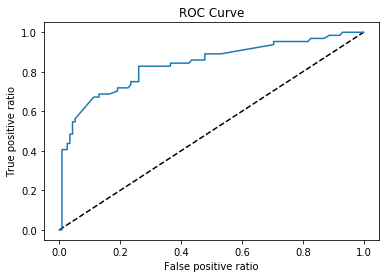

In [60]:
from sklearn.metrics import roc_curve,roc_auc_score

test_pred_proba=log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, test_pred_proba)
# fpr= false positive rate
# tpr= true positive rate

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC Curve");

In [77]:
c_değerleri = [10**i for i in range(-3,3)]
accuracy_values=pd.DataFrame(columns=["c_values","train_accuracy","test_accuracy"])

for c in c_değerleri:
    lr=linear_model.LogisticRegression(penalty="l2",C=c, random_state=0)
    lr.fit(X_train,Y_train)
    accuracy_values=accuracy_values.append({"c_values":c,
                                           "train_accuracy":lr.score(X_train,Y_train),
                                           "test_accuracy":lr.score(X_test,Y_test)}, ignore_index=True)
    
display(accuracy_values)

,c_values,train_accuracy,test_accuracy
0,0.001,0.609551,0.642458
1,0.010,0.713483,0.765363
2,0.100,0.786517,0.787709
3,1.000,0.799157,0.787709
4,10.000,0.785112,0.793296
5,100.000,0.786517,0.793296


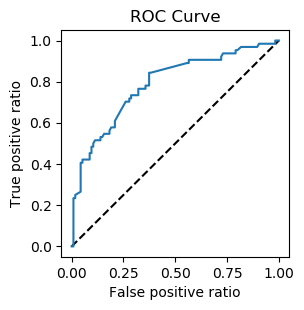

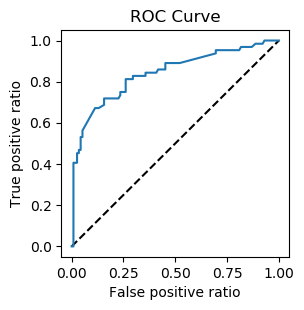

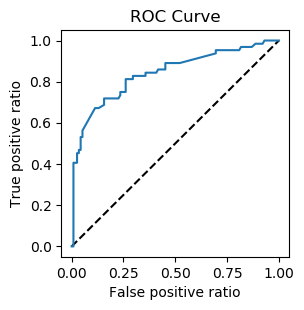

In [98]:
# c=0.001 için;
plt.figure(figsize=(10,3),dpi=100)
plt.subplot(1,3,1)
lr1=linear_model.LogisticRegression(C=0.001, random_state=0)
lr1.fit(X_train,Y_train)
test_pred_proba1=lr1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, test_pred_proba1)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC Curve")


# c=10 için;
plt.figure(figsize=(10,3),dpi=100)
plt.subplot(1,3,2)
lr2=linear_model.LogisticRegression(C=10, random_state=0)
lr2.fit(X_train,Y_train)
test_pred_proba2=lr2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, test_pred_proba2)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC Curve")



# c=1000 için;
plt.figure(figsize=(10,3),dpi=100)
plt.subplot(1,3,2)
lr3=linear_model.LogisticRegression(C=1000, random_state=0)
lr3.fit(X_train,Y_train)
test_pred_proba3=lr2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, test_pred_proba3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False positive ratio")
plt.ylabel("True positive ratio")
plt.title("ROC Curve");

# c değeri büyüdükçe daha çok regularize ettiği için yani overfitliği daha çok kaldırdığı için ROC eğrisi altında kalan alan yani AUC artacaktır.

# Regresyonda overfit modelleri regularize etmek için; Ridge(L2), Lasso(L1) ve ElasticNet(L1+L2) regresyonları kullanılarak alpha parametresi ile ceza katsayısı 
# verilir ve overfit özelliği azaltılmaya çalışılır.Lojistik regresyonda ise overfit özelliği azaltmak için C parametresi kullanılır.

## PRECISION/RECALL CURVE

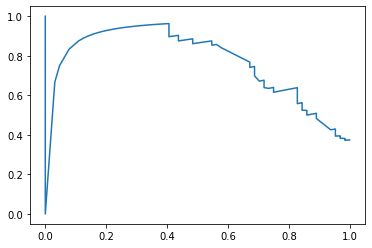

In [66]:
# Dengesiz datalarda kullanılmaktadır.

precision, recall, thresholds = precision_recall_curve(Y_test, test_pred_proba)

plt.plot(recall, precision);